## Perceptron

Perceptron was introduced by American psychologist Frank Rosenblatt in 1957. Rosenblatt's goal was to develop a computational model capable of learning and solving classification problems by simulating the functioning of neurons in the brain.

### Why should we study this algorithm that was proposed so long ago?

The perceptron is also considered the origin of neural networks (and deep learning). Therefore, learning about the construction of the perceptron is an important step in understanding the fundamental ideas that lead to neural networks and deep learning.

### What is the structure of perception?

As a simulation of a neuron, the perceptron receives multiple input signals and outputs a single signal. For simplicity, we define that the perceptron’s signal can only take two values (1/0), where 0 corresponds to "neuron not activated" and 1 corresponds to "neuron activated." The diagram below illustrates this:

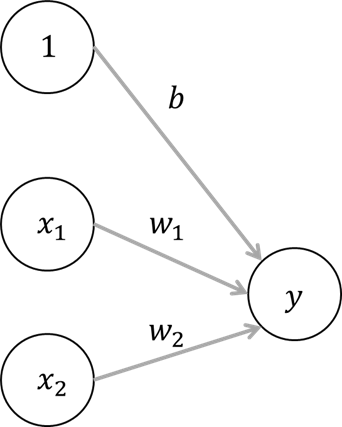

where $x_1$ and $x_2$ are the input signals (1/0)，$y$ is the output signal, $\omega_1$ and $\omega_2$ are the weights, and $b$ is the bias. When the input signals are sent to the neuron, the perceptron calculates the product of the input signals and their corresponding weights, then adds the bias. If this value is greater than the threshold $θ$, the output is 1; otherwise, the output is 0.

To express the above in mathematical terms, we have:

$y = \begin{cases}
0 & (w_1 x_1 + w_2 x_2 + b\leq \theta) \\
1 & (w_1 x_1 + w_2 x_2 +b > \theta)
\end{cases}$

The perceptron is a binary classification model. Simply put, it generates a classification result based on the features of the input data. In the original perceptron model, the neuron produces an output by performing a linear combination of the input signals and passing the result through an activation function (which we will discuss later). This concept is largely inspired by neurobiology, aiming to simulate how neurons in the human brain process information.

## Decision Broundary

Decision boundary is an important concept in machine learning, especially in classification problems. It refers to the "line" or "hyperplane" in the feature space that separates data points of different classes. One can imagine that when we use a model to classify data, the decision boundary is the boundary the model uses to determine which class a data point belongs to.

We will use a simple logic circuit as an example to help understand the decision boundary and the role of the perceptron.

### Logic circuit

First, let's consider how we can use a perceptron to construct an AND gate in a logic circuit. An AND gate is a logic gate with two inputs and one output. As shown in the table below, the AND gate outputs 1 when ($x_1$, $x_2$) = (1, 1), and outputs 0 when ($x_1$, $x_2$) = (0, 1), (1, 0), or (0, 0).

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 0   |
| 1     | 0     | 0   |
| 0     | 1     | 0   |
| 1     | 1     | 1   |

Next, let's consider using a perceptron to represent this AND gate. For simplicity, we set the threshold $θ$ to 0. What we need to do is determine the values of $w_1$, $w_2$ and $b$ that satisfy the conditions in the table above. What values should we set in order to create a perceptron that meets the required conditions?

Let's try to visualize the operation of the AND gate. In the case of the AND gate, when the weight parameters ($w_1$, $w_2$ , $b$) = (1.0, 0.8, -1.5), the conditions of the truth table are satisfied. At this point, the perceptron can be represented by the following equation:

$y = \begin{cases}
0 & (x_1 + 0.8 × x_2 + (-1.5)\leq 0) \\
1 & (x_1 + 0.8 × x_2 +(-1.5) > 0)
\end{cases}$

The perceptron represented by the above equation generates two regions in the feature space, separated by the line $x_1 + 0.8 × x_2 + (-1.5)= 0$. One region will output 1, and the other will output 0. The line that divides the plane into two regions is one example of a decision boundary.

#### Plot a decision boundary

We can use the following code to plot this decision boundary.

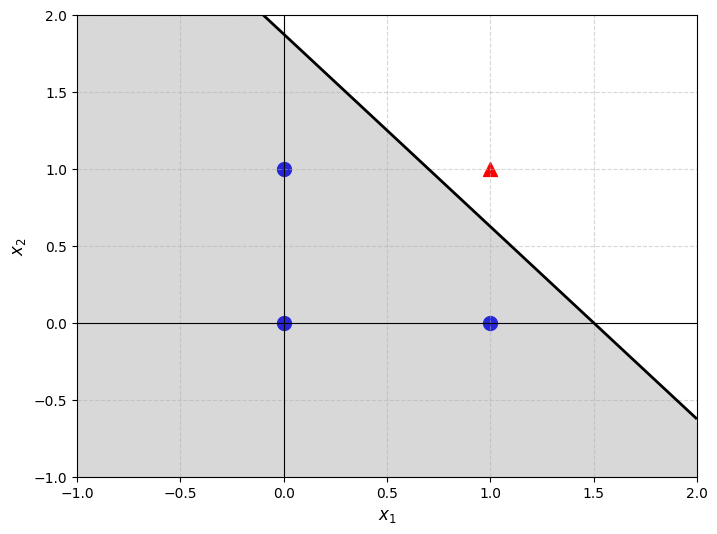

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def draw_decision_boundary_and_gate(w1,w2,b):
    # Creating the plot
    plt.figure(figsize=(8, 6))

    # Plotting the data points
    point_pos_x1 = np.array([1])
    point_pos_x2 = np.array([1])
    plt.scatter(point_pos_x1, point_pos_x2, color='red', marker='^', s=100)
    point_neg_x1 = np.array([0, 1,0])
    point_neg_x2 = np.array([1, 0,0])
    plt.scatter(point_neg_x1, point_neg_x2, color='blue', marker='o', s=100)

    # Drawing the decision boundary
    x1_vals = np.linspace(-1, 2, 100)
    x2_vals = np.linspace(-1, 2, 100)
    x1, x2 = np.meshgrid(x1_vals, x2_vals)
    y = w1 * x1 + w2 * x2 + b
    plt.contour(x1, x2, y, levels=[0], colors='black',linewidths=2)
    plt.contourf(x1, x2, y, levels=[-np.inf, 0], colors='gray', alpha=0.3)

    # Plot settings
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Displaying the plot
    plt.show()

draw_decision_boundary_and_gate(w1=1,w2=0.8,b=-1.5)

In the figure above, the circles (○) represent 0, and the triangles (△) represent 1. When ($w_1$, $w_2$ , $b$) = (1.0, 0.8, -1.5), the generated decision boundary successfully separates the points correctly.

Certainly, the settings of weight and bias parameters are not limited to this particular case. By adjusting these parameters, different decision boundaries can be explored.

#### Plot decision boundaries with different bias

Bias is a parameter that adjusts the ease with which a neuron is activated (i.e., the degree to which the output signal equals 1). Through the following example, we can explore the impact of different bias values on the resulting decision boundary.

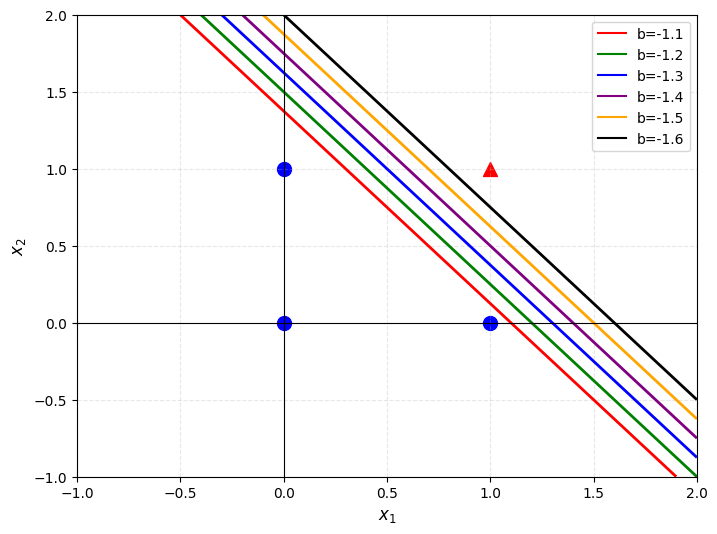

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle

def draw_decision_boundary_and_gate(w1,w2,b_list):
    # Creating the plot
    plt.figure(figsize=(8, 6))

    # Plotting the data points
    point_pos_x1 = np.array([1])
    point_pos_x2 = np.array([1])
    plt.scatter(point_pos_x1, point_pos_x2, color='red', marker='^', s=100)
    point_neg_x1 = np.array([0, 1,0])
    point_neg_x2 = np.array([1, 0,0])
    plt.scatter(point_neg_x1, point_neg_x2, color='blue', marker='o', s=100)

    # Drawing the decision boundaries
    proxy_lines=[]
    color_cycle = cycle(['r', 'g', 'b', 'purple', 'orange', 'black'])
    colors = [next(color_cycle) for _ in range(len(b_list))]
    labels=[]
    for i,b in enumerate(b_list):
        x1_vals = np.linspace(-1, 2, 100)
        x2_vals = np.linspace(-1, 2, 100)
        x1, x2 = np.meshgrid(x1_vals, x2_vals)
        y = w1 * x1 + w2 * x2 + b
        plt.contour(x1, x2, y, levels=[0],linewidths=2,colors=colors[i])
        proxy_lines.append(Line2D([0], [0], color=colors[i], linestyle='-'))
        labels.append(f'b={b:.1f}')

    # Plot settings
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(proxy_lines, labels)

    # Displaying the plot
    plt.show()

# Keep w1 and w2 constant and only adjust b
b_list=np.arange(-1.1, -1.7, -0.1)
draw_decision_boundary_and_gate(w1=1,w2=0.8,b_list=b_list)

As shown in the above figure, the bias $b$ has an independent update rule, meaning that it can be adjusted independently of the input features, thereby optimizing the classification performance.

#### Plot decision boundaries with different weights

Each input signal in a perceptron has its own inherent weight, which plays a crucial role in controlling the importance of each signal. In other words, the greater the weight, the more significant the corresponding signal is. Through the following example, we can explore the impact of different weights on the result.

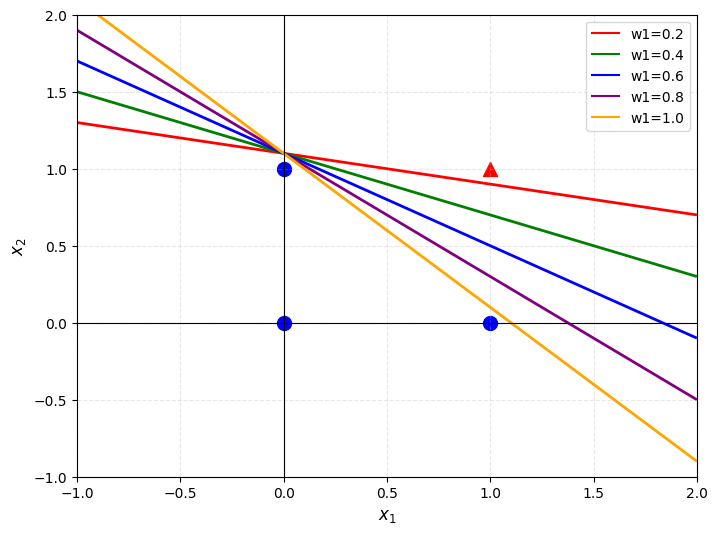

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle

def draw_decision_boundary_and_gate(w1_list,w2,b):
    # Creating the plot
    plt.figure(figsize=(8, 6))

    # Plotting the data points
    point_pos_x1 = np.array([1])
    point_pos_x2 = np.array([1])
    plt.scatter(point_pos_x1, point_pos_x2, color='red', marker='^', s=100)
    point_neg_x1 = np.array([0, 1,0])
    point_neg_x2 = np.array([1, 0,0])
    plt.scatter(point_neg_x1, point_neg_x2, color='blue', marker='o', s=100)

    # Drawing the decision boundaries
    proxy_lines=[]
    color_cycle = cycle(['r', 'g', 'b', 'purple', 'orange', 'black'])
    colors = [next(color_cycle) for _ in range(len(w1_list))]
    labels=[]
    for i,w1 in enumerate(w1_list):
        x1_vals = np.linspace(-1, 2, 100)
        x2_vals = np.linspace(-1, 2, 100)
        x1, x2 = np.meshgrid(x1_vals, x2_vals)
        y = w1 * x1 + w2 * x2 + b
        plt.contour(x1, x2, y, levels=[0],linewidths=2,colors=colors[i])
        proxy_lines.append(Line2D([0], [0], color=colors[i], linestyle='-'))
        labels.append(f'w1={w1:.1f}')

    # Plot settings
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(proxy_lines, labels)

    # Displaying the plot
    plt.show()

# Keep w2 and b constant and only adjust w1
w1_list=np.arange(0.2, 1.2, 0.2)
draw_decision_boundary_and_gate(w1_list=w1_list,w2=1,b=-1.1)

As shown in the above figure, in a perceptron, the weight $w_1$ affects the contribution of the input $x_1$  to the output $y$.

From the perspective of the decision boundary, the perceptron's decision boundary is a straight line.

When $w_1$ increases, the slope of the decision boundary, $-\frac{w_1}{w_2}$, also changes, meaning the decision boundary rotates.

The larger $w_1$ is, the stronger the influence along the $x_1$ direction, making the decision boundary more sensitive to changes in $x_1$.

## The Limitation of Perceptron

We already know that a perceptron can be used to implement an AND logic gate. Now, let's consider the XOR gate.

The XOR gate outputs 1 when ($x_1$, $x_2$) = (0, 1) or (1,0) and outputs 0 when ($x_1$, $x_2$) = (0, 0) or (1, 1). It outputs 1 only when one of $x_1$ or $x_2$
 is 1.

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 0     | 0     | 0   |
| 1     | 0     | 1   |
| 0     | 1     | 1   |
| 1     | 1     | 0   |

However, a perceptron cannot implement the XOR gate by simply plotting the truth table as an image. We can see that the perceptron is unable to achieve this XOR gate functionality. We can try to think through the reason by visualizing the problem.

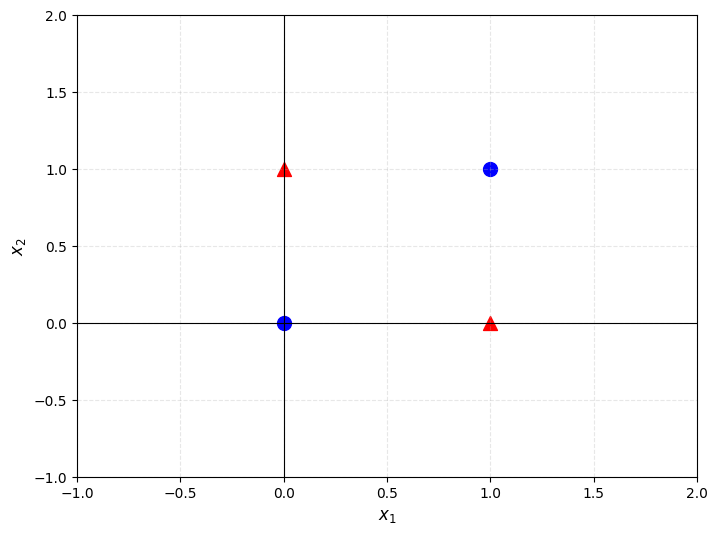

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def draw_xor_gate():
    # Creating the plot
    plt.figure(figsize=(8, 6))

    # Plotting the data points
    point_pos_x1 = np.array([0, 1])
    point_pos_x2 = np.array([1, 0])
    plt.scatter(point_pos_x1, point_pos_x2, color='red', marker='^', s=100)
    point_neg_x1 = np.array([0, 1])
    point_neg_x2 = np.array([0, 1])
    plt.scatter(point_neg_x1, point_neg_x2, color='blue', marker='o', s=100)


    # Plot settings
    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.xlabel('$x_1$', fontsize=12)
    plt.ylabel('$x_2$', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Displaying the plot
    plt.show()

draw_xor_gate()

It is impossible to separate the circles (○) and triangles (△) in the above figure with a single straight line, no matter how hard we try. In fact, it is impossible to separate the circles and triangles with just one line.

The limitation of the perceptron lies in the fact that it can only represent spaces that are divided by a single straight line. Such spaces, divided by a line, are called linear spaces